This notebook prepares the data for training a ML model on it and an actual ML training.

We need to build 2 models where one of them predicts the chance of rainfall today and another predicts the chance of rainfall tomorrow.

## Prepare the data

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [106]:
data = pd.read_csv("./dataset/rainfall_processed.csv")

In [107]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In the first part of this notebook, we need to predict RainToday, so we'll drop RainTomorrow.

In [108]:
data.drop("RainTomorrow", axis=1, inplace=True)

In [109]:
print(len(data.columns))
data.columns

16


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir',
       'WindDir9am', 'WindDir3pm'],
      dtype='object')

### Standardizing the data

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
#splitting the data into independent variable (x) and dependent variable (y)
#where y is the RainToday

y = data["RainToday"]
x = data.drop("RainToday", axis=1)

In [112]:
#Get the columns names of x
feature_names = x.columns

In [113]:
#Initialize the StandardScaler
sc = StandardScaler()

#Transforming the data using transform
x = sc.fit_transform(x) #outputs an array
#convert the array into dataframe
x = pd.DataFrame(x, columns=feature_names)

### Splitting the data into Train and Test set

In [114]:
print(f"Number of samples in the dataset: {len(x)}")

Number of samples in the dataset: 145460


In [115]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [116]:
print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")

Number of training samples: 116368
Number of testing samples: 29092


## Machine Learning

### Training the model

We'll be using RandomForest from sklearn as our model. We can also use Gradient Boosting method from XGBoost as our ML algorithm.

The dataset is imbalanced, so we'll be using class weight argument to handle it.

In [117]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [118]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### Evaluating the model

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [120]:
predictions = model.predict(x_test)

In [121]:
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")
print(f"F1 Scorel: {f1_score(y_test, predictions)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Scorel: 1.0


In [122]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [123]:
confusion_matrix = confusion_matrix(y_test, predictions)

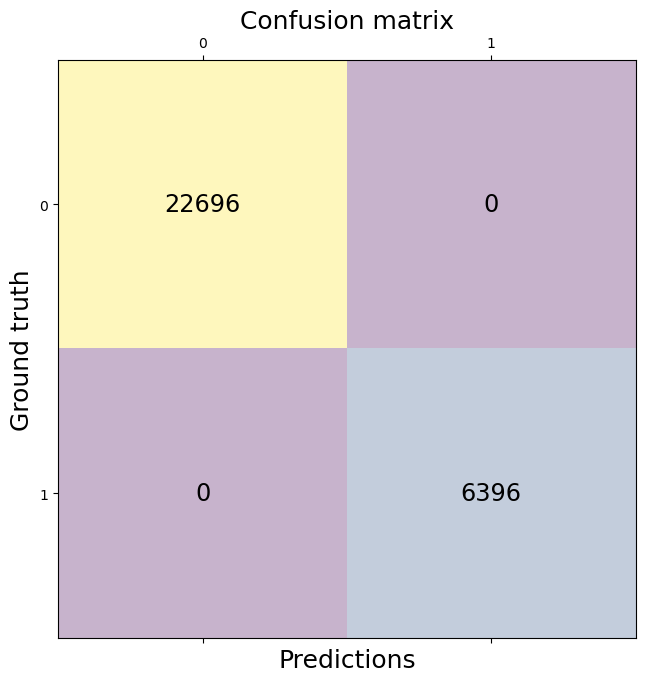

In [124]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(confusion_matrix, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=i, y=j, s=confusion_matrix[i,j], va='center', ha='center', size='xx-large')
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Ground truth", fontsize=18)
plt.title("Confusion matrix", fontsize=18)
plt.show()

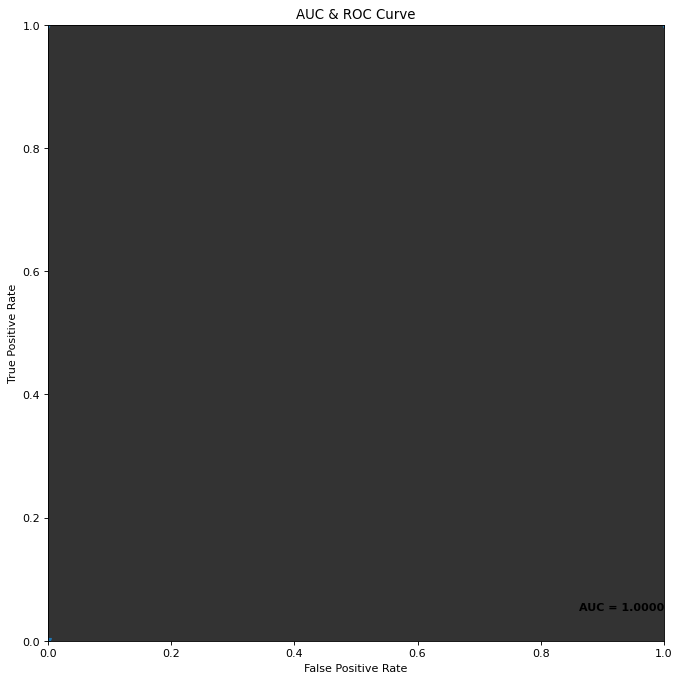

In [125]:
auc = roc_auc_score(y_test, predictions)

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(12,10), dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'v')
plt.fill_between(fpr, tpr, facecolor='black', alpha=0.8)
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Save the model

In [126]:
import pickle

In [127]:
pickle.dump(model, open("./saved models/model.pkl", "wb"))
pickle.dump(sc, open("./saved models/scaler.pkl", "wb"))

### For testing purposes

In [128]:
test_data = data[data['RainToday']==0].copy()

In [130]:
test_data.drop("RainToday", axis=1, inplace=True)

In [134]:
sample_input = test_data.iloc[10,:]

In [135]:
sample_input

MinTemp             8.40000
MaxTemp            24.60000
Rainfall            0.00000
WindGustSpeed      40.03523
WindSpeed9am        4.00000
WindSpeed3pm       30.00000
Humidity9am        57.00000
Humidity3pm        32.00000
Pressure9am      1009.70000
Pressure3pm      1008.70000
Temp9am            15.90000
Temp3pm            23.50000
WindGustDir         3.00000
WindDir9am          2.00000
WindDir3pm         14.00000
Name: 14, dtype: float64

In [136]:
model.predict([sample_input])

c:\Users\balaj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)